In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn import metrics

In [2]:
### Read the input file and check the data dimension

In [3]:
credit = pd.read_csv("german_credit.csv")
credit.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [5]:
print("Assumption we use only 50% of data set for this lab from the Total data set = 500 from 1000")
credit.dtypes
credit.select_dtypes(include=['object']).columns

Assumption we use only 50% of data set for this lab from the Total data set = 500 from 1000


default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')

In [6]:
Credit_split1, Credit_split2 = train_test_split(credit, test_size=0.50,random_state = 1)

In [7]:
# Lets build a Ensemble model but need to modify the dataset first
Credit_split1.shape
Credit_split2.shape


(500, 21)

(500, 21)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
# Print Shape of model data
credit_data = pd.get_dummies(Credit_split1, columns=credit.select_dtypes(include=['object']).columns)
credit_data.head()
credit_data.shape


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
789,1,40,5998,4,3,27,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
179,0,21,571,4,4,65,2,1,0,1,...,1,0,0,1,0,0,1,0,0,1
27,0,12,409,3,3,42,2,1,0,0,...,0,1,0,1,0,0,1,0,0,1
33,0,12,1264,4,4,57,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1
334,1,24,4110,3,4,23,2,2,0,1,...,0,1,0,1,0,0,1,0,0,1


(500, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [9]:
credit_data.corr()


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.154395,0.102781,0.130897,-0.004657,-0.135853,-0.047948,0.005908,0.119061,0.266244,...,-0.083858,0.095812,-0.007669,-0.004743,-0.006760,0.014965,0.066688,-0.066688,-0.071374,0.071374
duration_in_month,0.154395,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544,0.139030,-0.038817,...,-0.038749,-0.118875,0.196724,0.011255,-0.034287,-0.186423,-0.185221,0.185221,-0.127211,0.127211
credit_amount,0.102781,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018,0.138910,-0.082235,...,-0.109663,-0.072627,0.375525,-0.125468,-0.076678,-0.172477,-0.318831,0.318831,-0.062949,0.062949
installment_as_income_perc,0.130897,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701,-0.032336,0.054283,...,0.029932,-0.050538,0.037229,0.021447,-0.066777,-0.040887,0.009868,-0.009868,-0.039202,0.039202
present_res_since,-0.004657,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483,-0.057776,0.030969,...,-0.256385,0.110245,-0.025189,-0.005186,0.047173,0.015645,-0.065494,0.065494,-0.087317,0.087317
age,-0.135853,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632,-0.077660,-0.008085,...,-0.027520,-0.185217,0.131774,-0.194528,0.115356,0.081238,-0.144705,0.144705,-0.027273,0.027273
credits_this_bank,-0.047948,-0.078458,-0.021106,0.017900,0.064556,0.142372,1.000000,0.114729,-0.074201,-0.074377,...,0.050856,-0.014214,-0.053292,0.002889,0.094538,0.017696,0.004274,-0.004274,-0.017713,0.017713
people_under_maintenance,0.005908,-0.057544,0.019018,-0.088701,0.057483,0.097632,0.114729,1.000000,-0.093340,0.101191,...,-0.091633,-0.014426,0.001558,-0.084729,-0.047677,0.116626,-0.026513,0.026513,0.007102,-0.007102
account_check_status_0 <= ... < 200 DM,0.119061,0.139030,0.138910,-0.032336,-0.057776,-0.077660,-0.074201,-0.093340,1.000000,-0.369723,...,-0.018287,0.027613,0.091056,-0.062256,-0.032286,0.001275,-0.029607,0.029607,-0.051992,0.051992
account_check_status_< 0 DM,0.266244,-0.038817,-0.082235,0.054283,0.030969,-0.008085,-0.074377,0.101191,-0.369723,1.000000,...,-0.109210,0.067046,-0.036253,0.021532,0.002052,0.006714,0.100149,-0.100149,0.010024,-0.010024


### Drop the original variables which are converted to dummy

In [10]:
credit["purpose"].unique()
print("Assumption to drop opriginal columns that are converted to dummy => purpose columns- We have 10 unique columns, So they are convertd to dummies now we can drop Purpose column alone")
print("By default those original columns will be re created into dummies, So it wont exists as per my scenario were I used entire data frame in dummies")
credit_model = credit_data.drop(columns = credit_data.select_dtypes(include=['object']).columns)

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

Assumption to drop opriginal columns that are converted to dummy => purpose columns- We have 10 unique columns, So they are convertd to dummies now we can drop Purpose column alone
By default those original columns will be re created into dummies, So it wont exists as per my scenario were I used entire data frame in dummies


In [11]:
credit_model.head()
credit_data.shape
credit_model.shape
print("columns still remians same 62")

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
789,1,40,5998,4,3,27,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
179,0,21,571,4,4,65,2,1,0,1,...,1,0,0,1,0,0,1,0,0,1
27,0,12,409,3,3,42,2,1,0,0,...,0,1,0,1,0,0,1,0,0,1
33,0,12,1264,4,4,57,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1
334,1,24,4110,3,4,23,2,2,0,1,...,0,1,0,1,0,0,1,0,0,1


(500, 62)

(500, 62)

columns still remians same 62


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [12]:

Y = credit_model['default']
X = credit_model.drop(columns = 'default')



In [13]:
Y.head()
X.head()

789    1
179    0
27     0
33     0
334    1
Name: default, dtype: int64

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
789,40,5998,4,3,27,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
179,21,571,4,4,65,2,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
27,12,409,3,3,42,2,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1
33,12,1264,4,4,57,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
334,24,4110,3,4,23,2,2,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [14]:
X = X.apply(zscore)

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 1)

In [16]:
Y_train.head()
Y_test.head()

543    1
519    0
536    0
260    0
569    1
Name: default, dtype: int64

961    0
338    0
758    0
97     0
254    0
Name: default, dtype: int64

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl.fit(X_train, Y_train)
y_predict = rfcl.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [18]:
print(metrics.confusion_matrix(Y_test, y_predict))
metrics.accuracy_score(Y_test, y_predict, normalize = True)

[[96  8]
 [29 17]]


0.7533333333333333

### Q6 Show the list of the features importance( 1 Marks)

In [19]:
print("Feature importance")
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

Feature importance
                                                         Imp
duration_in_month                                   0.061128
credit_amount                                       0.099335
installment_as_income_perc                          0.042206
present_res_since                                   0.032136
age                                                 0.087813
credits_this_bank                                   0.019030
people_under_maintenance                            0.010315
account_check_status_0 <= ... < 200 DM              0.015470
account_check_status_< 0 DM                         0.027337
account_check_status_>= 200 DM / salary assignm...  0.008618
account_check_status_no checking account            0.045243
credit_history_all credits at this bank paid ba...  0.007819
credit_history_critical account/ other credits ...  0.022426
credit_history_delay in paying off in the past      0.009838
credit_history_existing credits paid back duly ...  0.016083
credi

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [21]:
# Use below values
num_folds = 10
seed = 77

In [22]:

#num_instances = len(X)
seed = 77
kfold = KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
results = cross_val_score(model, X, Y, cv=kfold)
  

In [23]:
results

array([0.82, 0.84, 0.62, 0.72, 0.72, 0.86, 0.76, 0.84, 0.7 , 0.7 ])

In [24]:
#Validate the Random Forest model build above using k fold

In [25]:
print("Random forest came up with score 0.753 and K fold using Randome forest 0.758 , The model looks good model and not overfitting")

Random forest came up with score 0.753 and K fold using Randome forest 0.758 , The model looks good model and not overfitting


In [26]:
#Calculate Mean score

In [27]:
 #print("Mean Score: %.3f%% " % (results.mean())) 
results.mean()

0.758

In [28]:
# Calculate score standard deviation using std()

In [29]:
#print("Std: %.3f%%" % ( results.std()*100.0))  
results.std()

0.07507329751649383

# Q8 Print the confusion matrix( 1 Marks)

In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
kfold_pred = cross_val_predict(model, X, Y, cv=kfold)
conf_mat = confusion_matrix(Y, kfold_pred)
conf_mat

array([[320,  24],
       [ 97,  59]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [31]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [32]:
#bPrecis, bRecall, bFscore, bSupport = pr(gold, predicted, average='binary')
bPrecis, bRecall, bFscore, bSupport = precision_recall_fscore_support(Y, kfold_pred,average = 'macro' )
print("Precision ",bPrecis)
print("Recall ",bRecall)
print(classification_report(Y, kfold_pred))

Precision  0.7391147323105371
Recall  0.6542188431723315
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       344
           1       0.71      0.38      0.49       156

   micro avg       0.76      0.76      0.76       500
   macro avg       0.74      0.65      0.67       500
weighted avg       0.75      0.76      0.73       500



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [33]:
#Hint: Use roc_curve

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.0)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Receiver operating characteristic')

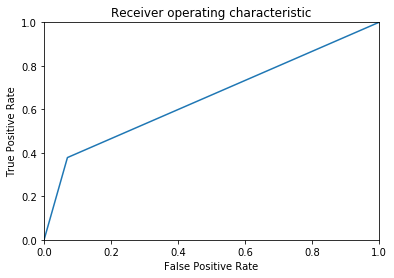

In [34]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, _ = roc_curve(Y, kfold_pred)



plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [35]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6542188431723315


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [36]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [37]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)


for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, Y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, Y_test)
    accuracy.append(acc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [38]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7339999999999999
Standard deviation:  0.010088497300281019
